In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import

In [3]:
path = 'C:/Users/84393/OneDrive - CÔNG TY TNHH OFFICIENCE/PYTHON/15_Feature_Selection/2_Chi_Squared_Test/'
file = 'Telco_data_chi2_test.csv'
df = pd.read_csv(path + file)
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Categorical Features

## take only categorical col

In [17]:
cat_features = df.drop(['customerID','TotalCharges'], axis=1).select_dtypes(include=['object'])
cat_features_list = list(cat_features)

cat_features_list

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [18]:
cat_features.isnull().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [19]:
cat_features.nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

## Convert to numeric

In [20]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
encoded = pd.DataFrame()
for col in cat_features.columns:
    encoded[col] = le.fit_transform(cat_features[col])

In [25]:
encoded.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [26]:
X = encoded.drop('Churn', axis=1)
y = encoded.Churn


## Chi-squared

In [64]:
from sklearn.feature_selection import chi2, SelectKBest

In [60]:
chi2_scores, p_values = chi2(X, y)
print(chi2_scores, p_values)
# The 1st array is chi-squared showing the relation between feature and target
# 2nd array: p-value of each feature

[2.58698618e-01 8.24120826e+01 1.33036443e+02 9.72606249e-02
 9.74692078e+00 9.82102823e+00 5.51611529e+02 2.30086520e+02
 1.91303140e+02 5.23303866e+02 7.49020319e+00 8.23539949e+00
 1.11578017e+03 1.05680863e+02 5.84922505e+01] [6.11015635e-001 1.10476396e-019 8.87672856e-031 7.55142091e-001
 1.79623344e-003 1.72527862e-003 5.61588231e-122 5.70786894e-052
 1.65153873e-043 8.08623624e-116 6.20355560e-003 4.10811292e-003
 1.22794132e-244 8.66198711e-025 2.04093269e-014]


In [39]:
type(chi2_scores)

numpy.ndarray

In [108]:
chi2_scores_series = pd.Series(chi2_scores, index=X.columns).sort_values(ascending=False)
pvalue_series = pd.Series(p_values, index=X.columns).sort_values(ascending=False)

In [109]:
chi2_scores_series

Contract            1115.780167
OnlineSecurity       551.611529
TechSupport          523.303866
OnlineBackup         230.086520
DeviceProtection     191.303140
Dependents           133.036443
PaperlessBilling     105.680863
Partner               82.412083
PaymentMethod         58.492250
InternetService        9.821028
MultipleLines          9.746921
StreamingMovies        8.235399
StreamingTV            7.490203
gender                 0.258699
PhoneService           0.097261
dtype: float64

## Plot

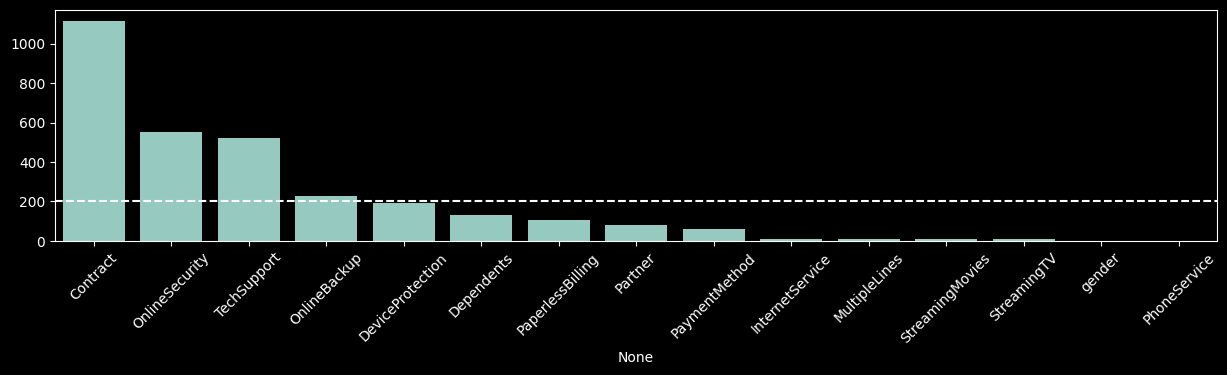

In [110]:
# Consider high chi2 score
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
sns.barplot( x=chi2_scores_series.index, y = chi2_scores_series.values)
plt.axhline(np.mean(chi2_scores_series.values), linestyle = '--')

<Axes: xlabel='None'>

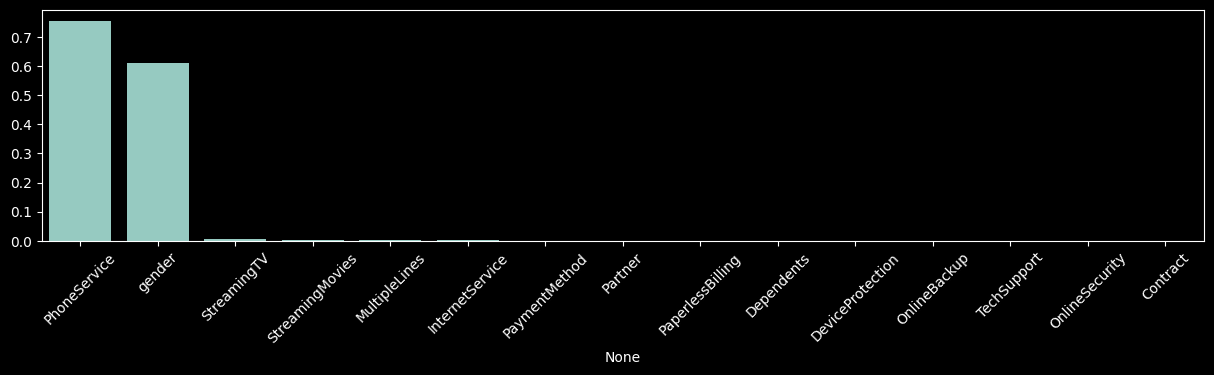

In [63]:
# Take low p-value
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
sns.barplot( x=pvalue_series.index, y = pvalue_series.values)

## Conclude:
to get Kbest = 9 or 10 

# Model

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression

In [81]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_absolute_percentage_error

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10 )

In [ ]:
model_params = {
    'svm': {
        'model': SVC(),
        'params': {
            'C': [5,10]
        }
    },
    'rf':{
        'model': RandomForestClassifier(),
        'params':{}
    }
}

In [112]:
models = [LinearRegression(), SVC(), RandomForestClassifier(), MultinomialNB(), GaussianNB(),LogisticRegression()]

In [113]:
scores = []
for m in models:
    pipe = Pipeline([
    ('feature_selection', SelectKBest(score_func=chi2, k=9)),
    ('classifier', m)
    ])
    # clf = GridSearchCV(pipe, cv=5, return_train_score=False)
    cv = cross_val_score(pipe, X, y, cv =5)
    scores.append({
        'model': m,
        'cv_avg': np.average(cv)
    })
    # clf.fit(X, y)
    # scores.append({
    #     'model': m,
    #     'score_best': clf.best_score_,
    #     'score_params': clf.best_params_
    #     }
    # )

In [114]:
scores

[{'model': LinearRegression(), 'cv_avg': np.float64(0.20919202167564183)},
 {'model': SVC(), 'cv_avg': np.float64(0.7721139267049487)},
 {'model': RandomForestClassifier(), 'cv_avg': np.float64(0.7591926293631848)},
 {'model': MultinomialNB(), 'cv_avg': np.float64(0.7660093997999871)},
 {'model': GaussianNB(), 'cv_avg': np.float64(0.7451355732627911)},
 {'model': LogisticRegression(), 'cv_avg': np.float64(0.7748123870894896)}]

In [87]:
scores

[{'model': SVC(),
  'cv': array([0.77785664, 0.7920511 , 0.77572747, 0.76988636, 0.7734375 ])},
 {'model': RandomForestClassifier(),
  'cv': array([0.75798439, 0.76721079, 0.73882186, 0.74360795, 0.76065341])},
 {'model': MultinomialNB(),
  'cv': array([0.76863023, 0.78495387, 0.75798439, 0.77414773, 0.76136364])},
 {'model': GaussianNB(),
  'cv': array([0.74875798, 0.76366217, 0.73882186, 0.74573864, 0.73650568])}]